In [1]:
import os
import sys
filepath_pc = r"C:\Users\Thomas Gausmann\sciebo - Gausmann, Thomas (t_gaus04@uni-muenster.de)@uni-muenster.sciebo.de\Masterarbeit\price_simulator"
filepath_laptop = r"C:\Users\gausm\sciebo - Gausmann, Thomas (t_gaus04@uni-muenster.de)@uni-muenster.sciebo.de\Masterarbeit\price_simulator"
os.chdir(filepath_laptop)
sys.path.append(filepath_laptop)
import numpy as np
import attr


In [2]:
import price_simulator.src.utils.analyzer as Analyzer
#from price_simulator.src.algorithm.agents.approximate import DiffDQN
from price_simulator.src.algorithm.agents.simple import AlwaysDefectAgent
from price_simulator.src.algorithm.agents.tabular import Qlearning
from price_simulator.src.algorithm.demand import LogitDemand
from price_simulator.src.algorithm.environment import DiscreteSynchronEnvironment
from price_simulator.src.algorithm.policies import DecreasingEpsilonGreedy
from price_simulator.src.algorithm.agents.lstm_agent import SimpleLSTMAgent  # Import the new LSTM agent

Loss: 0.0, Target: 0.401730028823484, Local Estimates: 0.4017300307750702
Loss: 0.0, Target: 0.6069975760819699, Local Estimates: 0.606997549533844
Loss: 0.0, Target: 0.4904205240675218, Local Estimates: 0.49042052030563354
Loss: 0.0, Target: 0.44134349716354415, Local Estimates: 0.4413434863090515
Loss: 0.0, Target: 0.4734147674010024, Local Estimates: 0.4734147787094116
Loss: 0.0, Target: 0.5467849828616421, Local Estimates: 0.5467849969863892
Loss: 0.0, Target: 0.5306195775127326, Local Estimates: 0.5306195616722107
Loss: 0.0, Target: 0.5002496208336698, Local Estimates: 0.5002496242523193
Loss: 0.0, Target: 0.3264550541611272, Local Estimates: 0.3264550566673279
Loss: 0.0, Target: 0.5906485321353832, Local Estimates: 0.5906485319137573
Loss: 0.0, Target: 0.542206566175114, Local Estimates: 0.5422065854072571
Loss: 0.0, Target: 0.4061809366352593, Local Estimates: 0.4061809480190277
Loss: 0.0, Target: 0.44009860153892094, Local Estimates: 0.4400986135005951
Loss: 0.0, Target: 0.5845

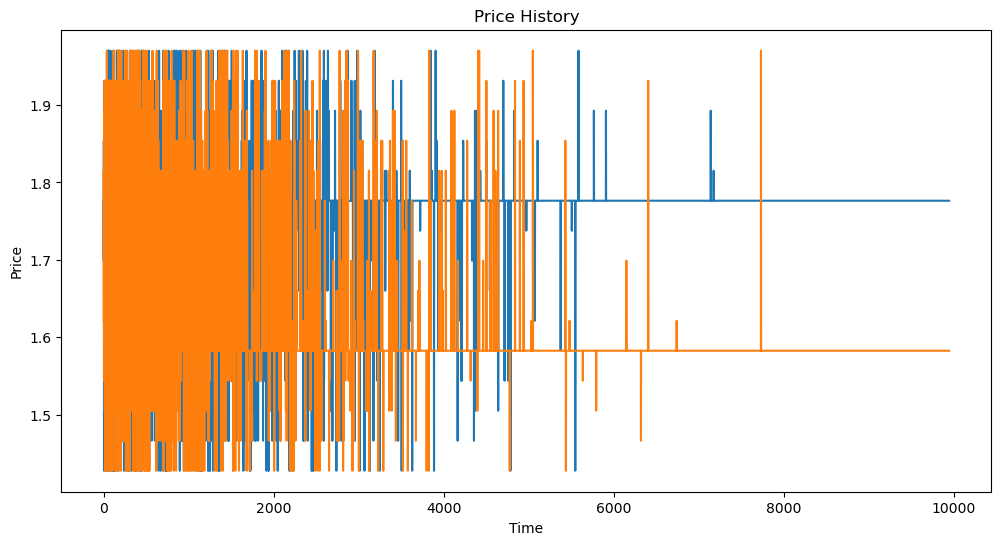

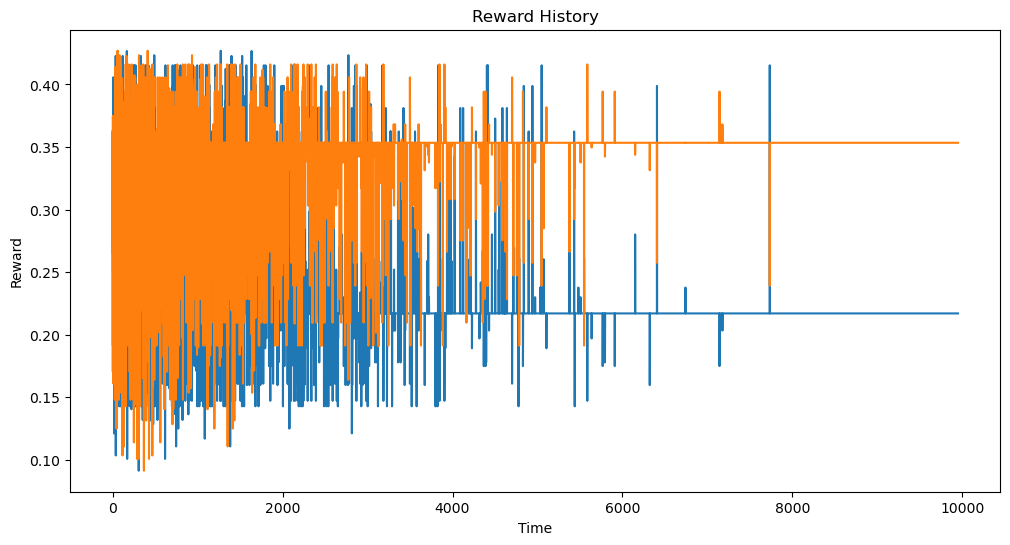

In [7]:
def run():
    dqn_env = DiscreteSynchronEnvironment(
        markup=0.1,
        n_periods=10000,
        possible_prices=[],
        n_prices=15,
        demand=LogitDemand(outside_quality=0.0, price_sensitivity=0.25),
        history_after=50,
        agents=[
            SimpleLSTMAgent(
                discount=0.95, learning_rate=0.125, decision=DecreasingEpsilonGreedy(), marginal_cost=1.0, quality=2.0, sequence_length=5
            ),
            SimpleLSTMAgent(
                discount=0.95, learning_rate=0.125, decision=DecreasingEpsilonGreedy(), marginal_cost=1.0, quality=2.0, sequence_length=5
            )
        ],
    )
    dqn_env.play_game()
    Analyzer.analyze(dqn_env)
    import matplotlib.pyplot as plt

    # Plot price history
    plt.figure(figsize=(12, 6))
    plt.plot(dqn_env.price_history)
    plt.title('Price History')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

    # Plot reward history
    plt.figure(figsize=(12, 6))
    plt.plot(dqn_env.reward_history)
    plt.title('Reward History')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.show()

run()

In [ ]:
dqn_env.price_history